# SC1015 Mini Project

# Contents
**Chapter 1: Data Extraction & cleaning**

**Chapter 2: Exploratory Data Analysis**

**Chapter 3: Machine Learning**


Objective
Based on the Medical Insurance Premium Prediction dataset by Tejashvi from Kaggle https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction 

we aim to find out:
how to predict medical premium prices based on various factors.



## **CHAPTER 1 : Data Extraction & cleaning**




In [8]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
sb.set()
import io 
from google.colab import files
#import all the relevant ilbs!

In [9]:
uploaded = files.upload()

Saving Medicalpremium.csv to Medicalpremium.csv


In [10]:
df = pd.read_csv(io.BytesIO(uploaded.get('Medicalpremium.csv')))
df.head()
#Taking a look at our data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [11]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

**All our data is already numerical, so this removes the need for one hot encoding for categorical data.**

**Of all the data, only Age, Height, weight and Premium price are numerical data. The rest are all categorical data.**

**We also do not have any NULL values, which removes the need for methods like imputation needing to be used to fill in NULL values**

In [12]:
#Get all our numerical data and seperate them into their own dataframe for EDA later on
numericDataDF = pd.DataFrame(df[['Age', 'Height', 'Weight', 'PremiumPrice']])
numericDataDF.head(10)

,Age,Height,Weight,PremiumPrice
0,45,155,57,25000
1,60,180,73,29000
2,36,158,59,23000
3,52,183,93,28000
4,38,166,88,23000
5,30,160,69,23000
6,33,150,54,21000
7,23,181,79,15000
8,48,169,74,23000
9,38,182,93,23000


**Let us clean the numerical data first before we check the correlation by removing the outliers! Let us first see if there are any outliers in our numerical data through a box plot!**

Text(0.5, 1.0, 'Weight')

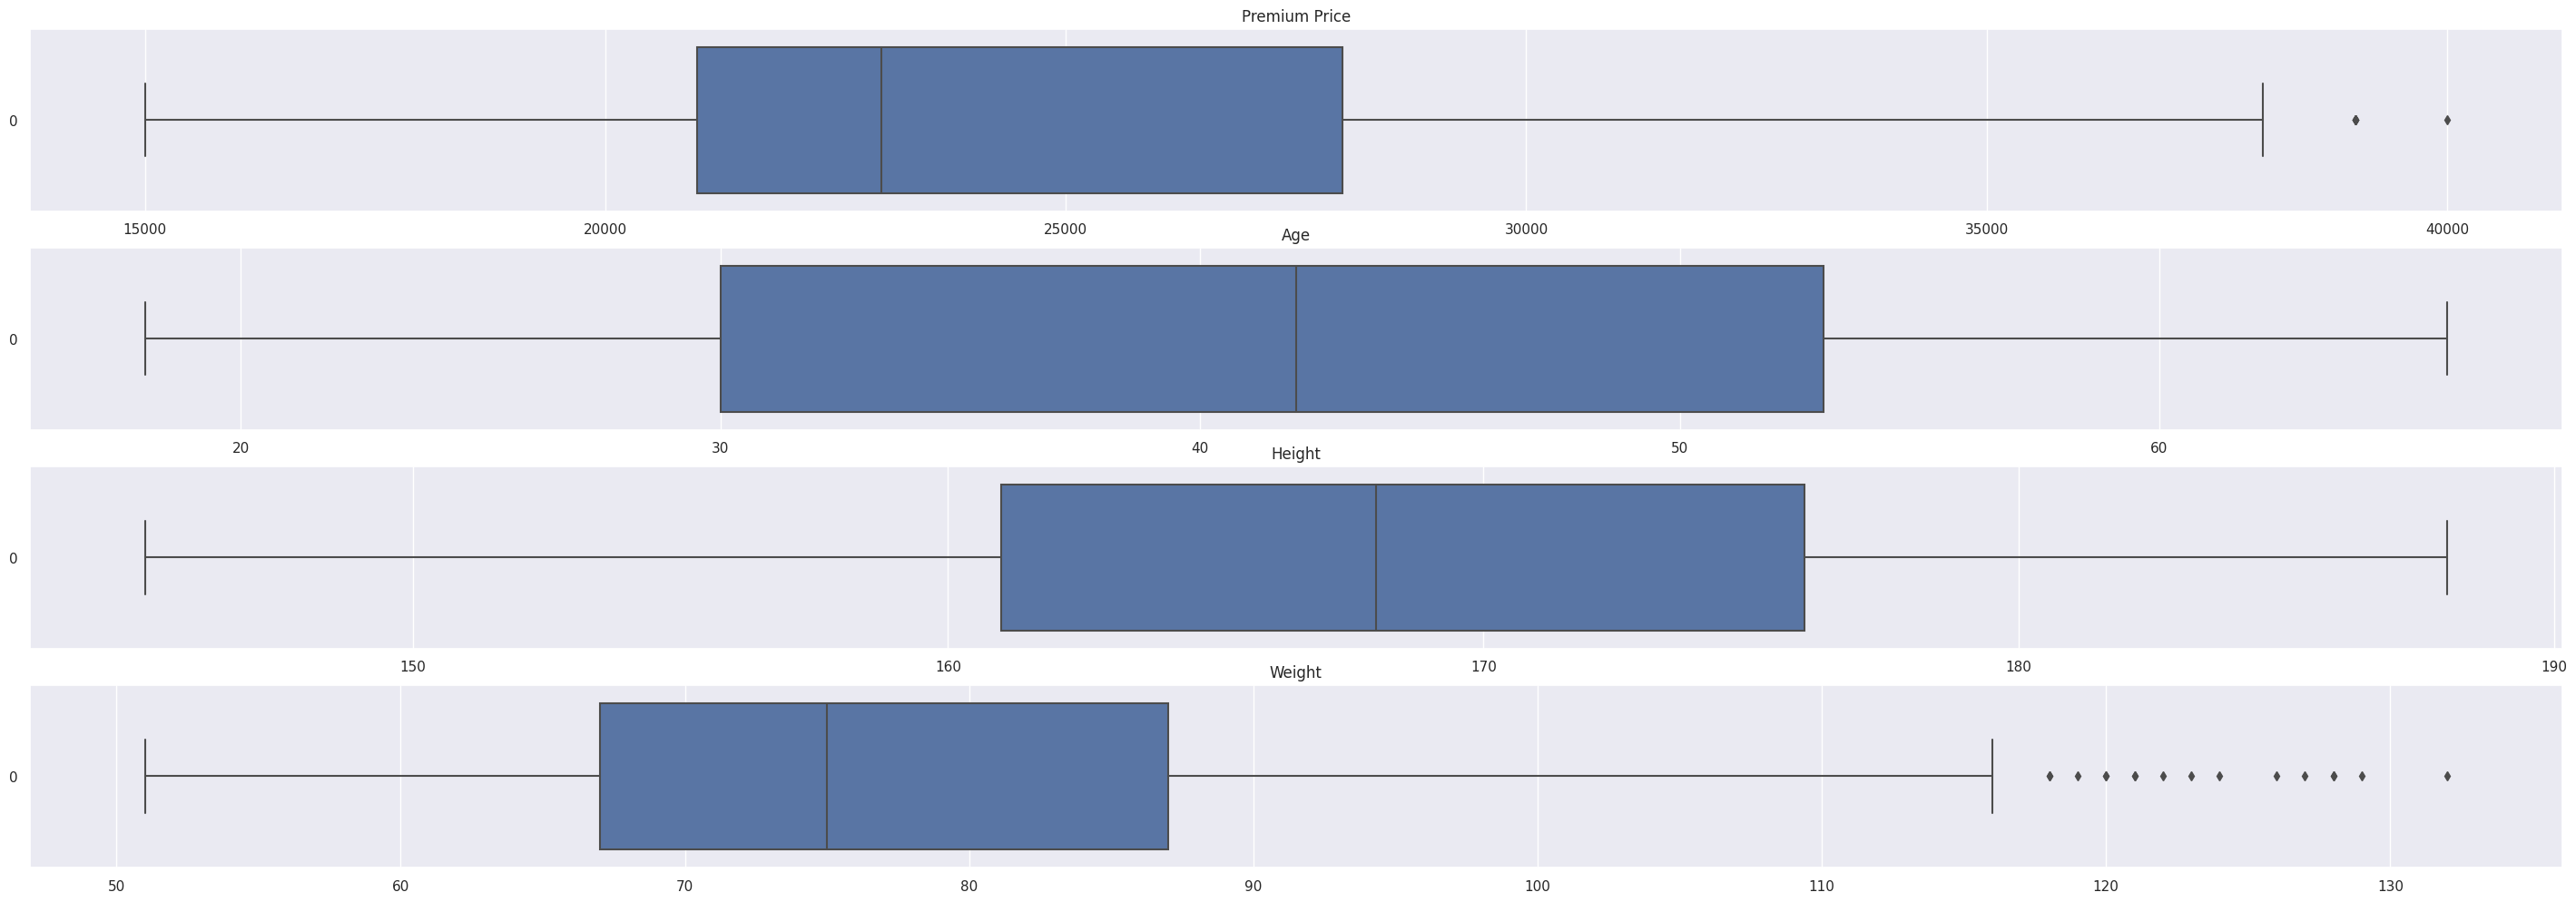

In [13]:
f, axes = plt.subplots(4, 1, figsize=(36,12))
# Create boxplots with titles
sb.boxplot(data=df['PremiumPrice'], orient="h", ax=axes[0])
axes[0].set_title('Premium Price')

sb.boxplot(data=df['Age'], orient="h", ax=axes[1])
axes[1].set_title('Age')

sb.boxplot(data=df['Height'], orient="h", ax=axes[2])
axes[2].set_title('Height')

sb.boxplot(data=df['Weight'], orient="h", ax=axes[3])
axes[3].set_title('Weight')

**By observing the box plots, it is clear to see that a large amount of outliers are present form the 'weight' column. This can be observed by the small diamond dots that are outside of the whiskers of the box plot.**

**We define outliers as the data that is outside of the Inter-quartile range (IQE) - 1st quartile (or + 3rd quartile) of the box plot, and will remove them to make our prediction later on more accurate**

In [14]:
df.info()
#Number of data before outlier removal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [15]:
#TIME TO REMOVE OUTLIERS
# Calculate quartiles and IQR for each numerical variable
Q1 = numericDataDF.quantile(0.25)
Q3 = numericDataDF.quantile(0.75)
IQR = Q3 - Q1

#Lower and upper whisker
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove all data that are outside of the whiskers!
outliers = (numericDataDF < lower_bound) | (numericDataDF > upper_bound)
df = df[~outliers.any(axis=1)]
numericDataDF = numericDataDF[~outliers.any(axis = 1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      965 non-null    int64
 1   Diabetes                 965 non-null    int64
 2   BloodPressureProblems    965 non-null    int64
 3   AnyTransplants           965 non-null    int64
 4   AnyChronicDiseases       965 non-null    int64
 5   Height                   965 non-null    int64
 6   Weight                   965 non-null    int64
 7   KnownAllergies           965 non-null    int64
 8   HistoryOfCancerInFamily  965 non-null    int64
 9   NumberOfMajorSurgeries   965 non-null    int64
 10  PremiumPrice             965 non-null    int64
dtypes: int64(11)
memory usage: 90.5 KB


**A total of 21 outliers (2%) have been removed!**

## **Chapter 2: EDA**

**Let us start off our EDA by relooking at the box plot of our numerical data to ensure that it is ready for exploration**

Text(0.5, 1.0, 'Weight')

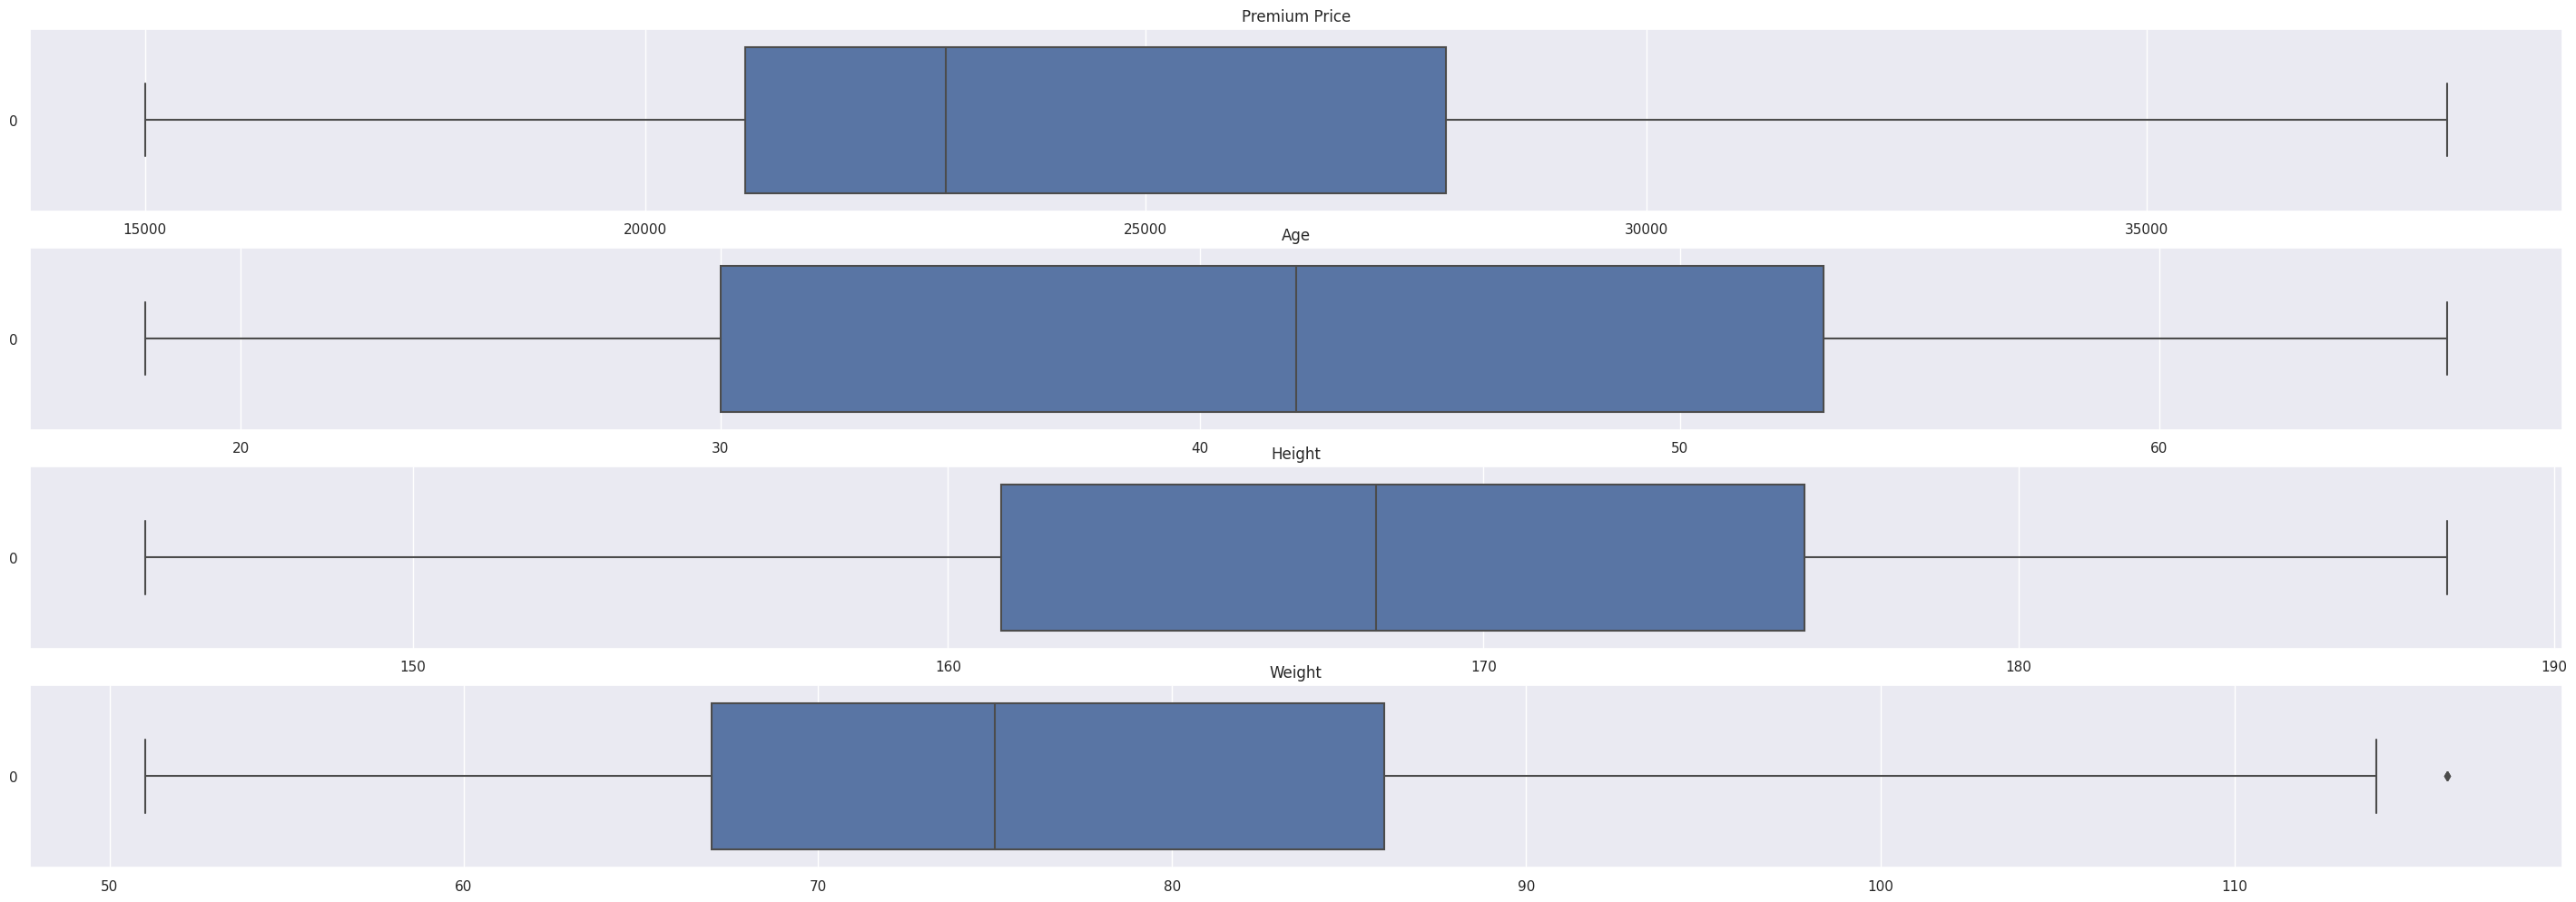

In [16]:
f, axes = plt.subplots(4, 1, figsize=(36,12))
# Create boxplots with titles
sb.boxplot(data=df['PremiumPrice'], orient="h", ax=axes[0])
axes[0].set_title('Premium Price')

sb.boxplot(data=df['Age'], orient="h", ax=axes[1])
axes[1].set_title('Age')

sb.boxplot(data=df['Height'], orient="h", ax=axes[2])
axes[2].set_title('Height')

sb.boxplot(data=df['Weight'], orient="h", ax=axes[3])
axes[3].set_title('Weight')

In [17]:
numericDataDF.describe()

,Age,Height,Weight,PremiumPrice
count,965.000000,965.000000,965.000000,965.000000
mean,41.843523,168.238342,76.191710,24248.704663
std,13.876881,10.136577,13.063583,6128.830488
min,18.000000,145.000000,51.000000,15000.000000
25%,30.000000,161.000000,67.000000,21000.000000
50%,42.000000,168.000000,75.000000,23000.000000
75%,53.000000,176.000000,86.000000,28000.000000
max,66.000000,188.000000,116.000000,38000.000000


**The numerical data looks clean and ready to go!**

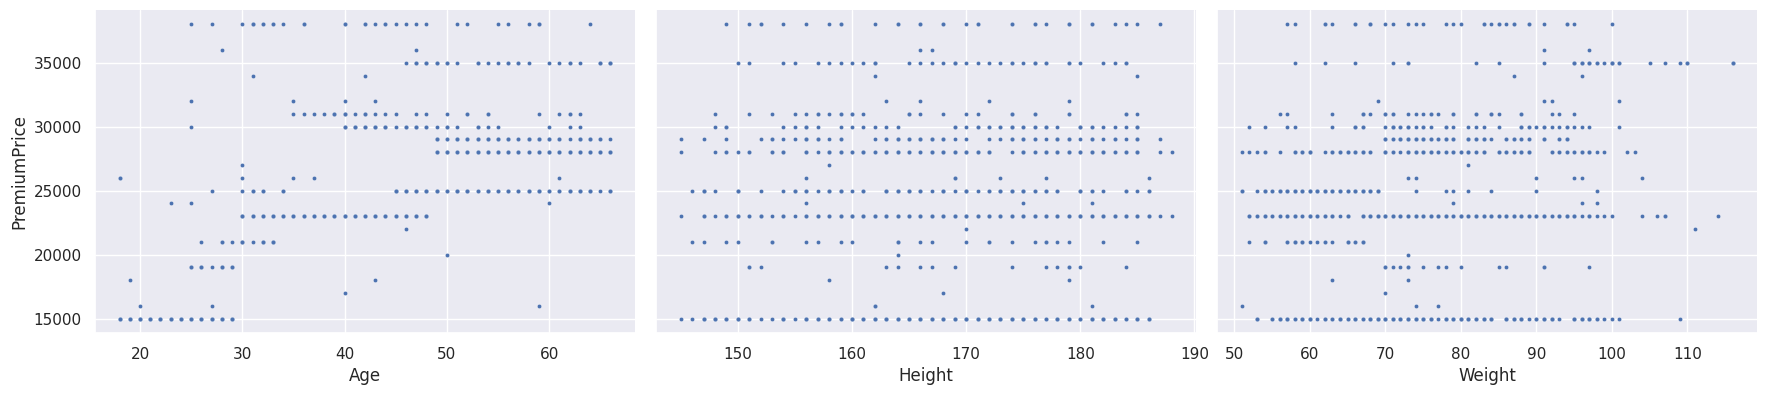

In [18]:
# Assuming your DataFrame is named numericDataDF and has columns 'age', 'height', 'weight', and 'premium_price'
sb.pairplot(
    data=numericDataDF,
    x_vars=['Age', 'Height', 'Weight'],
    y_vars=['PremiumPrice'],
    plot_kws=dict(marker=".", linewidth=0.2),
    diag_kws=dict(fill=False),
    height=4,  # Adjust the height of each facet
    aspect=1.5,  # Adjust the width of each facet (width = height * aspect)
)

**So the graphs all look very weird with straight dotted lines. This in hindsight, is to be expected because premium prices have set prices at certain values, so a lot of customers will have the same price**

**Immediately, there is a slightly noticable positive correlation in age, while weight and height barely have any just by looking at them. Let us take a deeper dive into this with a correlation matrix!**

<Axes: >

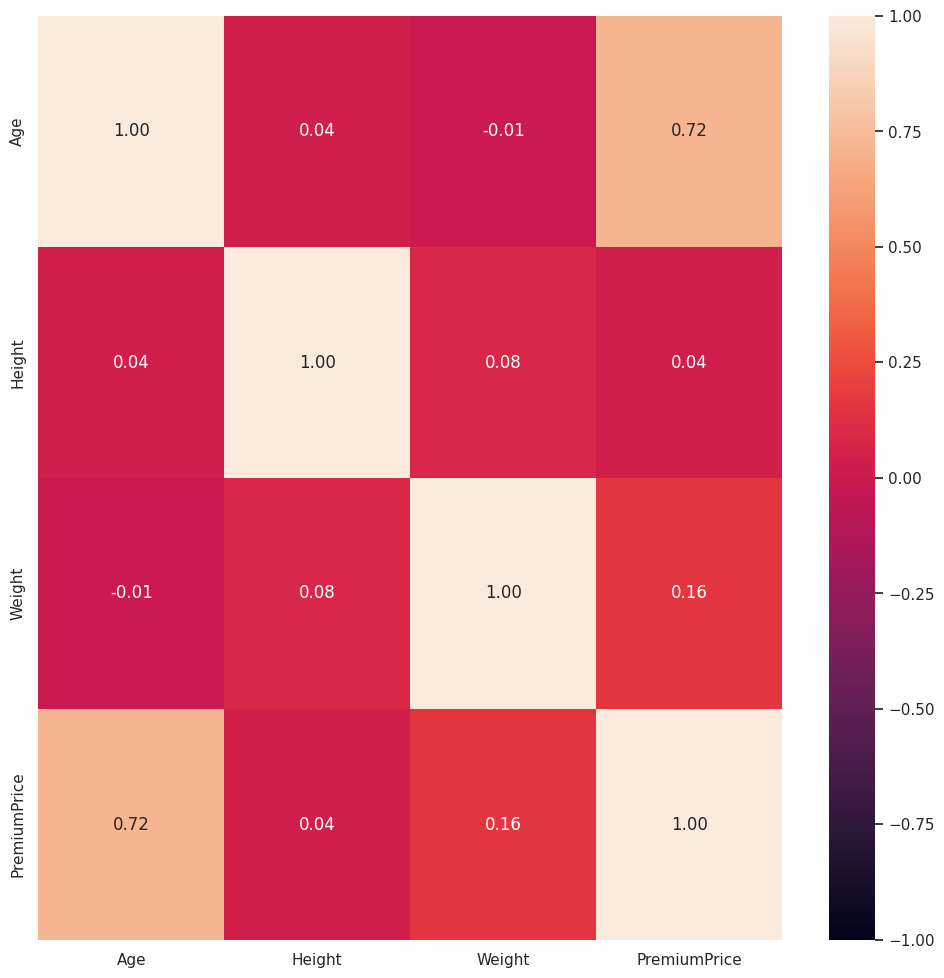

In [19]:
#CORRELATION MATRIX
f = plt.figure(figsize=(12, 12))
sb.heatmap(numericDataDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

**Our previous hypothesis is correct! Age has a surprisingly strong positive correlation with premium price, sitting at 0.72 in the matrix! Weight and Height especially, do not seem to have a strong correlation with premium price.**

**However, with that said, our group now suspects that there is a chance that BMI may have an effect on premium prices! BMI takes in both height and weight in it's calculation, so there is a chance that BMI will have a strong correlation with premium price!**

In [20]:
# add a new column with BMI values since we suspect BMI to be correlated
# BMI's formula is Weight/height^2, where height is in metres and weight is in kg
df['BMI'] = round(df['Weight'] / ((df['Height'] / 100) ** 2), 2)
df.to_csv('SC1015', index=False)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.73
1,60,1,0,0,0,180,73,0,0,0,29000,22.53
2,36,1,1,0,0,158,59,0,0,1,23000,23.63
3,52,1,1,0,1,183,93,0,0,2,28000,27.77
4,38,0,0,0,1,166,88,0,0,1,23000,31.93


<Axes: >

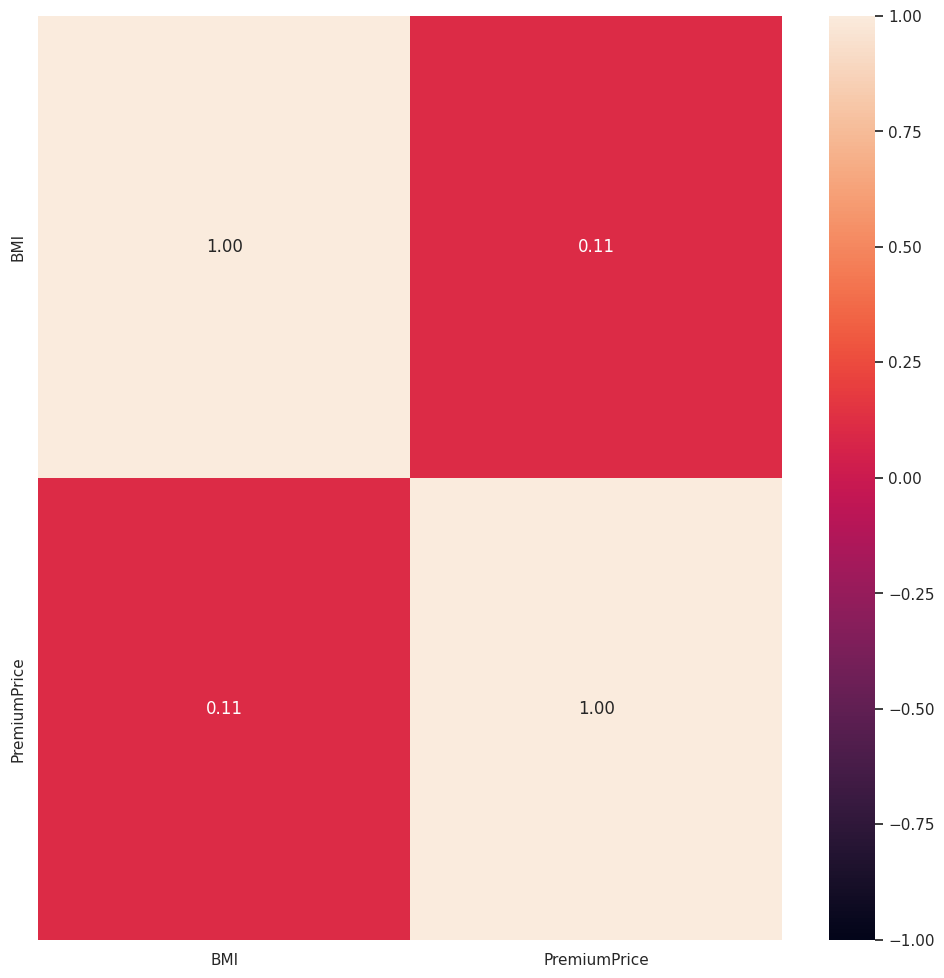

In [21]:
#Let us check the correlation between BMI and premium price
BMIChecker = pd.DataFrame(df[['BMI', 'PremiumPrice']])
f = plt.figure(figsize=(12, 12))
sb.heatmap(BMIChecker.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

**It is very surprising that BMI has a worse correlation with premium price in relation with weight alone!**

**But, to cover all grounds, Our group suspects that there could be a correlation if we split the BMI into categories of underweight, average and overweight! Lets explore that by splitting it into a new column called BMI category with 0 for underweight, 1 for normal BMI and 2 for overweight with one hot encoding techniques for categorical data!**

**We will be using the World health organisation standard for BMI, where underweight is < 18.5 and overweight is >=25 ***

**Note that this BMI_Category is a categorical data!**

In [22]:
# Define the function to categorize BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif 19 <= bmi < 25:
        return 1  # Healthy
    else:
        return 2




# Apply the function to the 'bmi' column and create a new column called 'bmi_category'
df['BMI category'] = df['BMI'].apply(categorize_bmi)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI category
0,45,0,0,0,0,155,57,0,0,0,25000,23.73,1
1,60,1,0,0,0,180,73,0,0,0,29000,22.53,1
2,36,1,1,0,0,158,59,0,0,1,23000,23.63,1
3,52,1,1,0,1,183,93,0,0,2,28000,27.77,2
4,38,0,0,0,1,166,88,0,0,1,23000,31.93,2


**Let us start to make observations of the relationship between all of our categorical data with premium price, including our new feature engineered BMI category!**

<Axes: xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

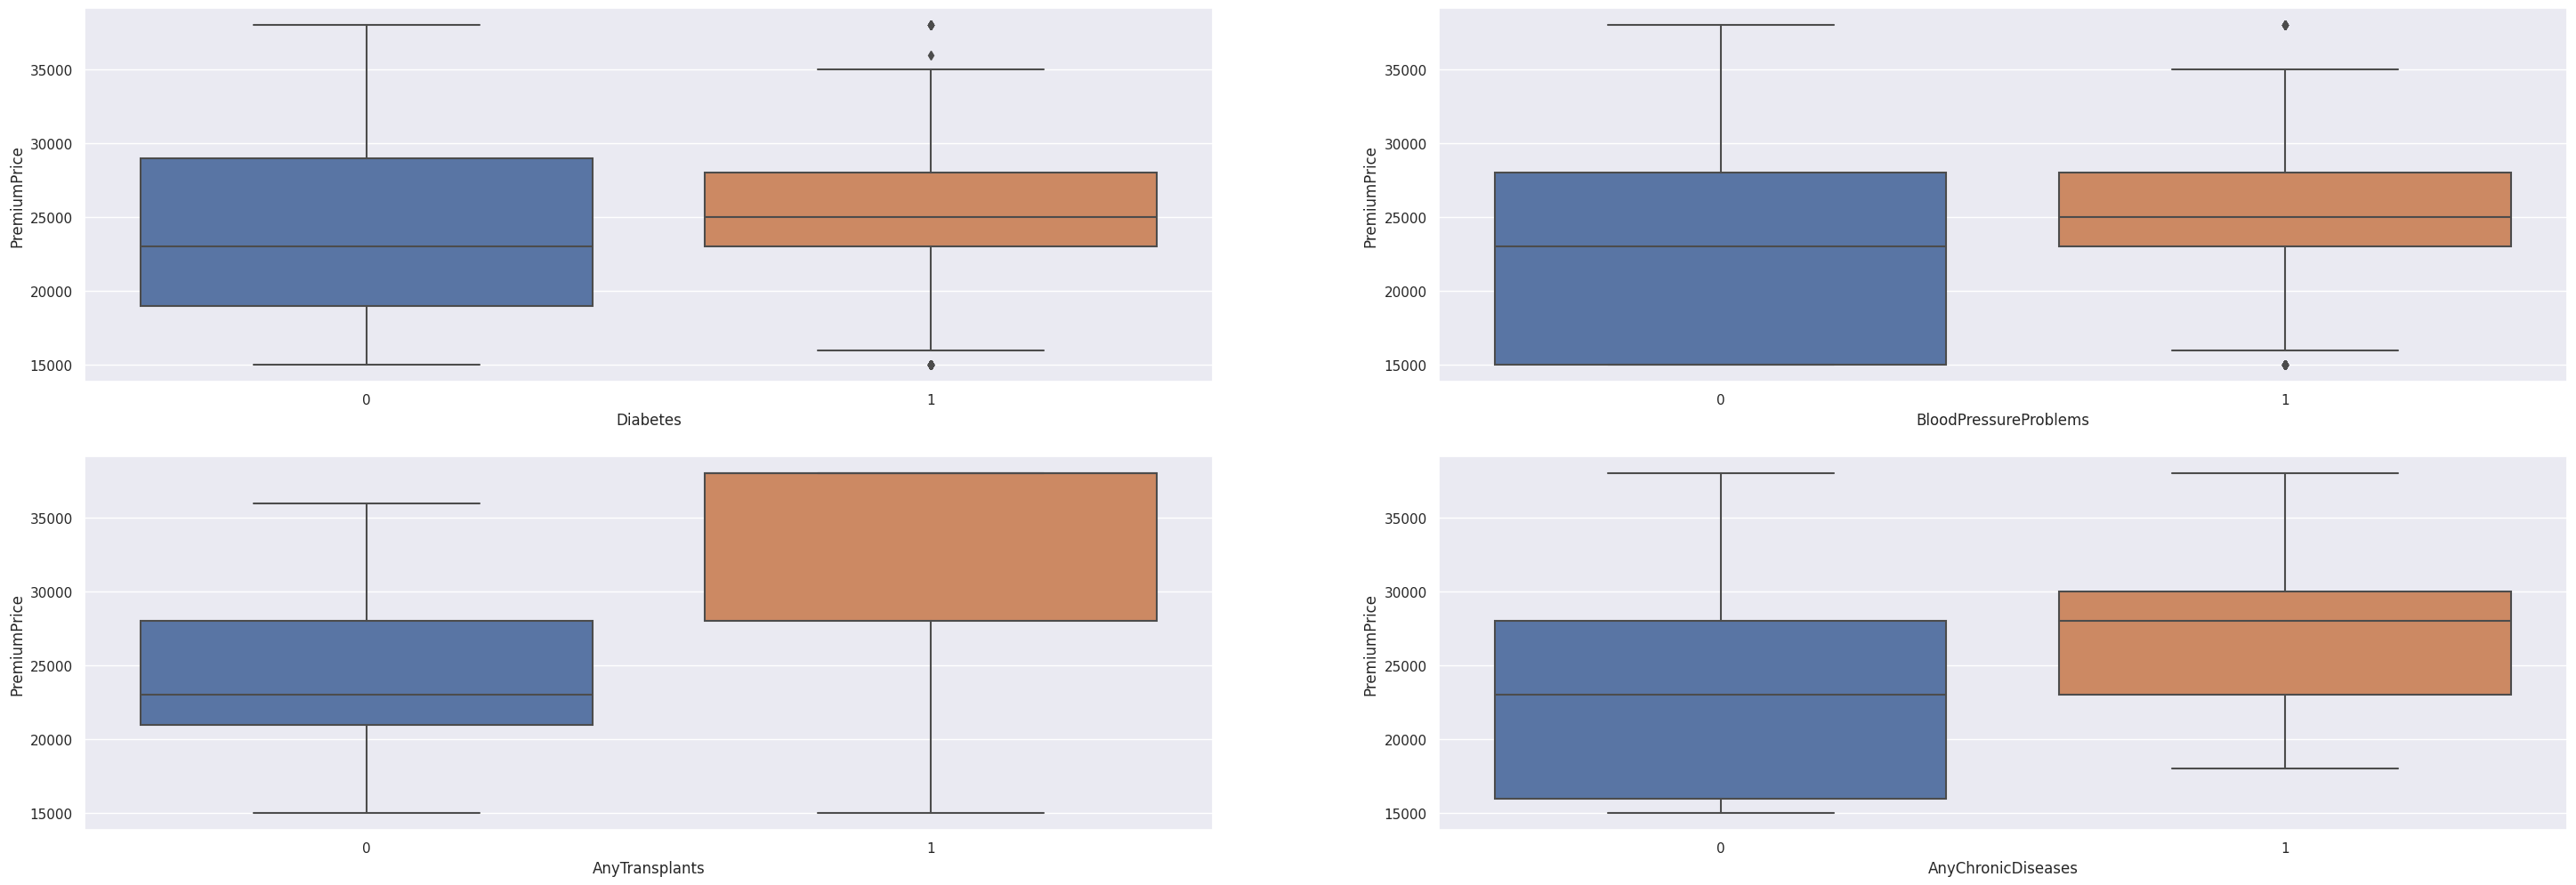

In [23]:
#Compare diabetes, bloodpressureproblems, anytransplants, anychronicdiseases with premium prices!
f, axes = plt.subplots(2, 2, figsize=(36,12))
sb.boxplot(x = df['Diabetes'], y = df['PremiumPrice'], ax = axes[0, 0])
sb.boxplot(x = df['BloodPressureProblems'], y = df['PremiumPrice'], ax = axes[0, 1])
sb.boxplot(x = df['AnyTransplants'], y = df['PremiumPrice'], ax = axes[1, 0])
sb.boxplot(x = df['AnyChronicDiseases'], y = df['PremiumPrice'], ax = axes[1, 1])

<Axes: xlabel='BMI category', ylabel='PremiumPrice'>

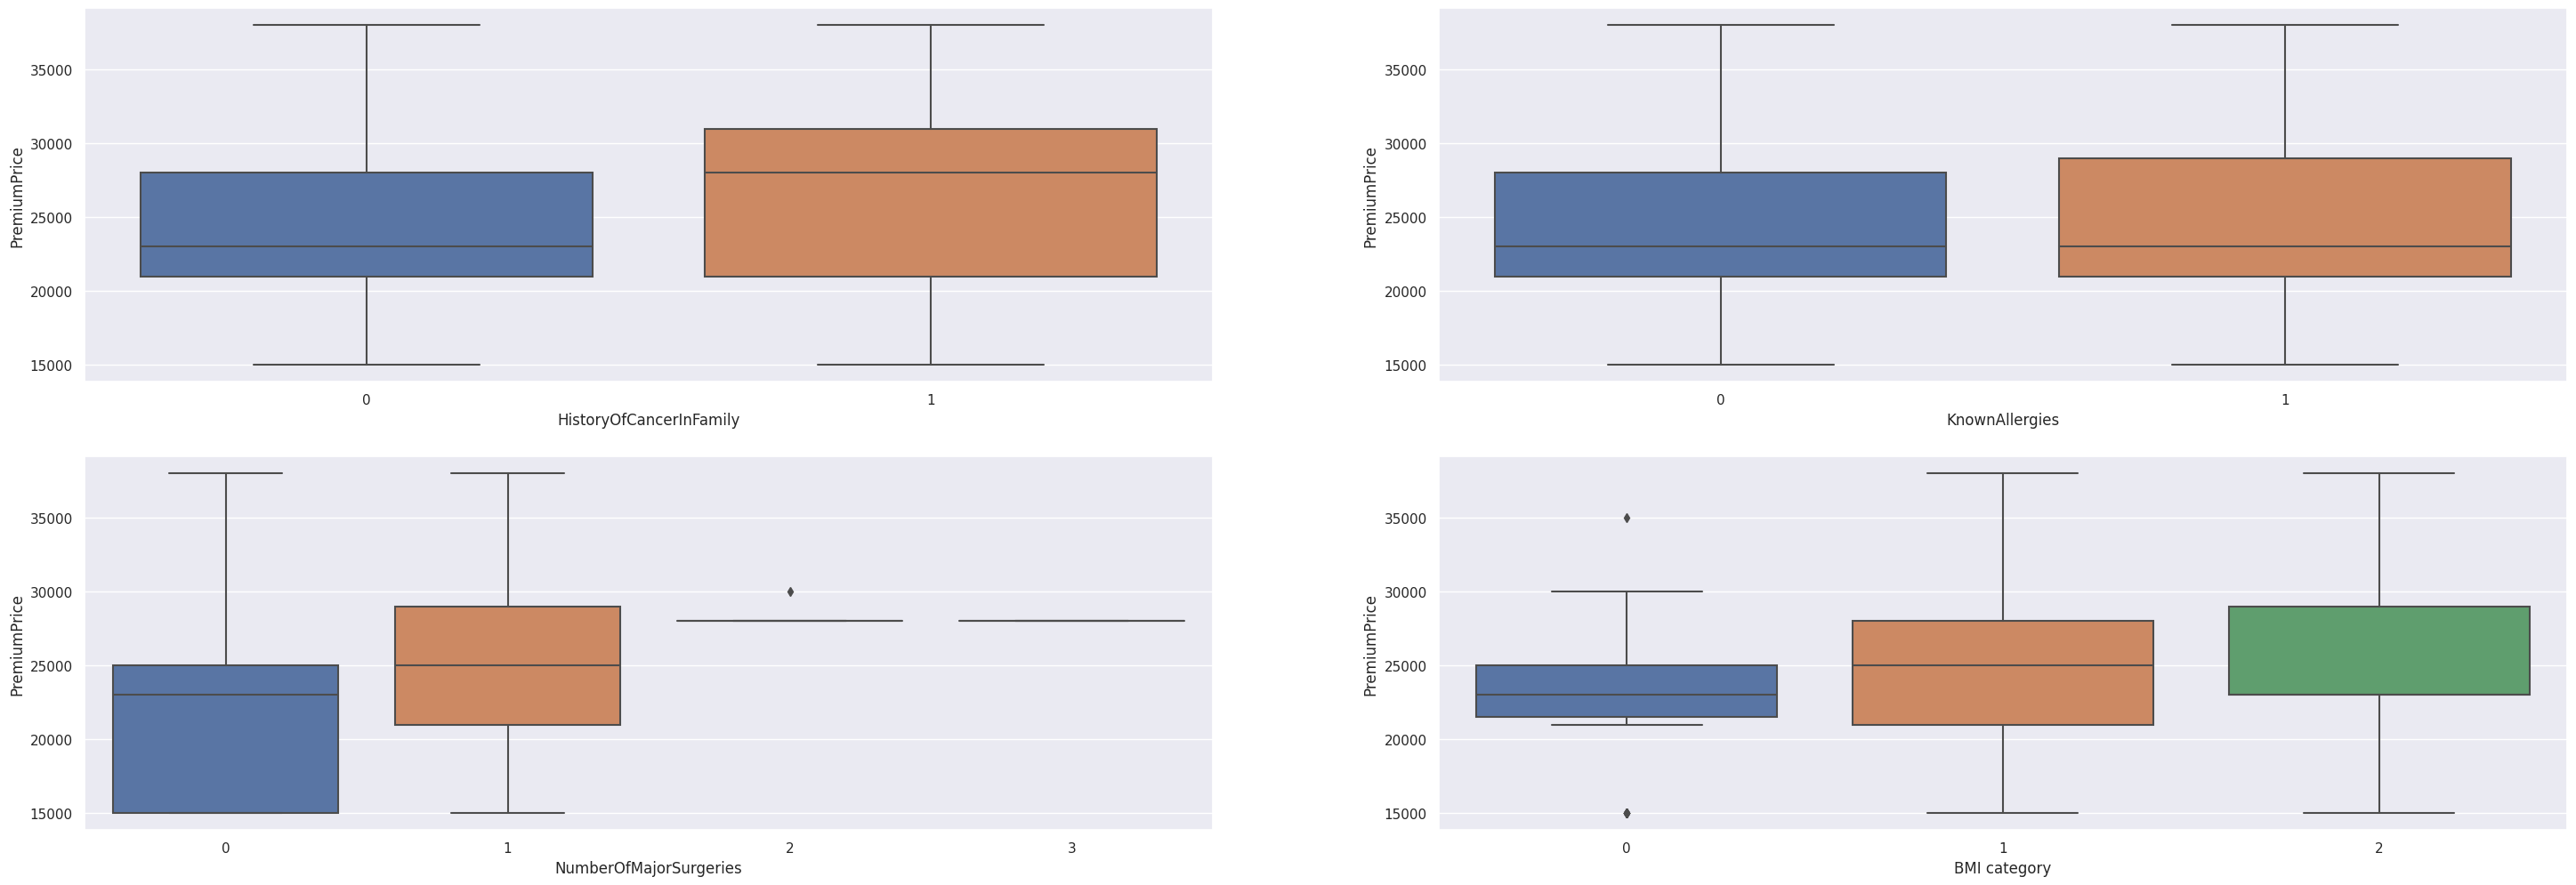

In [24]:
#Compare the remaining categorical data!
f, axes = plt.subplots(2, 2, figsize=(36, 12))
sb.boxplot(x = df['HistoryOfCancerInFamily'], y = df['PremiumPrice'], ax = axes[0, 0])
sb.boxplot(x = df['KnownAllergies'], y = df['PremiumPrice'], ax = axes[0, 1])
sb.boxplot(x = df['NumberOfMajorSurgeries'], y = df['PremiumPrice'], ax = axes[1, 0])
sb.boxplot(x = df['BMI category'], y = df['PremiumPrice'], ax = axes[1, 1])


In [25]:
medians = df.groupby('BMI category')['PremiumPrice'].median()
print(medians)
print('\n')

print("BMI category:")
print(df['BMI category'].value_counts())
print('\n')

print("Diabetes:")
print(df['Diabetes'].value_counts())
print('\n')

print("BloodPressureProblems:")
print(df['BloodPressureProblems'].value_counts())
print('\n')

print("AnyTransplants:")
print(df['AnyTransplants'].value_counts())
print('\n')

print("AnyChronicDiseases:")
print(df['AnyChronicDiseases'].value_counts())
print('\n')

print("HistoryOfCancerInFamily:")
print(df['HistoryOfCancerInFamily'].value_counts())
print('\n')

print("NumberOfMajorSurgeries:")
print(df['NumberOfMajorSurgeries'].value_counts())


BMI category
0    23000.0
1    25000.0
2    23000.0
Name: PremiumPrice, dtype: float64


BMI category:
2    627
1    300
0     38
Name: BMI category, dtype: int64


Diabetes:
0    556
1    409
Name: Diabetes, dtype: int64


BloodPressureProblems:
0    514
1    451
Name: BloodPressureProblems, dtype: int64


AnyTransplants:
0    911
1     54
Name: AnyTransplants, dtype: int64


AnyChronicDiseases:
0    789
1    176
Name: AnyChronicDiseases, dtype: int64


HistoryOfCancerInFamily:
0    852
1    113
Name: HistoryOfCancerInFamily, dtype: int64


NumberOfMajorSurgeries:
0    470
1    363
2    116
3     16
Name: NumberOfMajorSurgeries, dtype: int64


**Very surprisingly, BMI category has no obvious correlation with premium prices! Our original hypothesis was that being overweight or underweight will result in higher premium prices. But bizarrely, being average BMI has the highest median, while being overweight and uderweight have the same median premium prices at 23000, while having a very minor difference from average BMI! This suggests to us that BMI is a poor predictor of premiumprices**

**We can also easily see that Diabetes, blood pressure problems, Any transplants, Any chronic diseases and history of cancer have a very clear correlation with premium prices! Having a history of any of these health issues (denoted by 1) has a higher median in premium prices compared to those who didn't.**

**This cannot be said for known allergies, where there are no noticeable differences between having that health issue and not having it.**

**Number of major surgeries suffers a different issue, while there is a clear increase in premium prices if you have had a surgery, the category for 2 and 3 surguries are too little to make a proper observation. We need to rectify this by recreating Numberofmajorsurgeries into 1 new category, either having had a major surgery before or not. We will do that just below:**

In [26]:
## Adding a new variable type "hasMajorSurgery" where those with 0 major surgeries will be 0 and those with at least 1 major surgeries is 1. 
df['hadMajorSurgery'] = np.where(df['NumberOfMajorSurgeries'] >= 1, 1, 0)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,BMI category,hadMajorSurgery
0,45,0,0,0,0,155,57,0,0,0,25000,23.73,1,0
1,60,1,0,0,0,180,73,0,0,0,29000,22.53,1,0
2,36,1,1,0,0,158,59,0,0,1,23000,23.63,1,1
3,52,1,1,0,1,183,93,0,0,2,28000,27.77,2,1
4,38,0,0,0,1,166,88,0,0,1,23000,31.93,2,1


<Axes: xlabel='hadMajorSurgery', ylabel='PremiumPrice'>

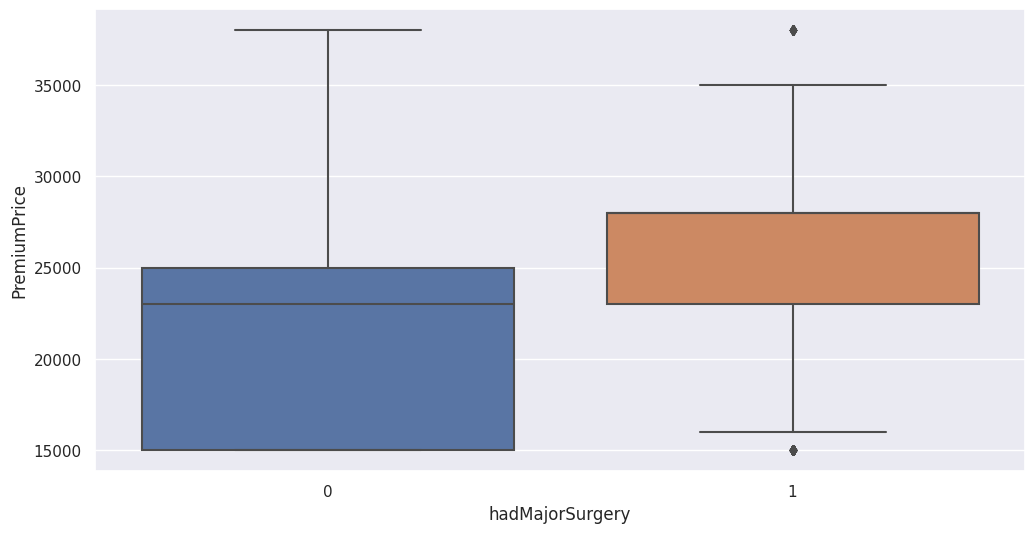

In [27]:
f, axes = plt.subplots(1, figsize=(12, 6)) 
sb.boxplot(x = df['hadMajorSurgery'], y = df['PremiumPrice']) 

In [28]:
medians = df.groupby('hadMajorSurgery')['PremiumPrice'].median()
print(medians)
print(df['hadMajorSurgery'].value_counts())

hadMajorSurgery
0    23000.0
1    28000.0
Name: PremiumPrice, dtype: float64
1    495
0    470
Name: hadMajorSurgery, dtype: int64


**So with that done, it is now abundantly clear that having a major surgury is a strong indicator for increase in premium price!**

## Conclusion:

**Before we move on to our machine learning, let us recap what we have learnt from our EDA!**

**For our numerical data, we realise that Age is the only factor that has a strong correlation with Premium prices! So it will be an important factor to include into our machine learning in the next part!**

**We have attempted to work on our hypothesis of BMI being a strong indicator for premium prices, but in both version of BMI we have tried, both showed poor correlation, and as such is a poor indicator**

**For our categorical data, all but Known allergies have shown a strong correlation with premium prices simply through observation!**

**With that said, having a poor correlation does not mean that we cannot use it in our machine learning model later on**

#Chapter 3: **Machine learning**

**Part 1 : Random forest**

**We have decided to go with a random forest machine learning model for a few reasons:**

1)Random forest has a better accuracy over the decision tree due to the tendancy for over fitting causing accuracy issues in decision trees. Especially when we have so many data columns, the accuracy of random forest is more attractive.

2)Following the 1st point, Random forest is less susceptible to noise as it averages out the results, which is important because of our wide range of data columns.

3)Random forest can provide us an estimate of the importance of the various columns in prediction. Since most of our data is categorical, we do not have access to a correlation matrix, so a random forest is able to cover for this

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

In [30]:
#Split premium price into its own DF
Premium = df["PremiumPrice"]
#Split the data we want to compare with premium price
The_others = df[['Diabetes', 'BloodPressureProblems', 'AnyChronicDiseases', 'AnyTransplants', 'HistoryOfCancerInFamily', 'Age', 'Weight', 'hadMajorSurgery']]

#Split the data into train and test set, in a 80:20 ratio
The_others_train, The_others_test, Premium_train, Premium_test = train_test_split(The_others, Premium, train_size=0.8, random_state=4)

#Fit the train set onto the model
model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=4)
model.fit(The_others_train, Premium_train)

#Predict the premium price post training with the test set
Premium_Predict = model.predict(The_others_test)

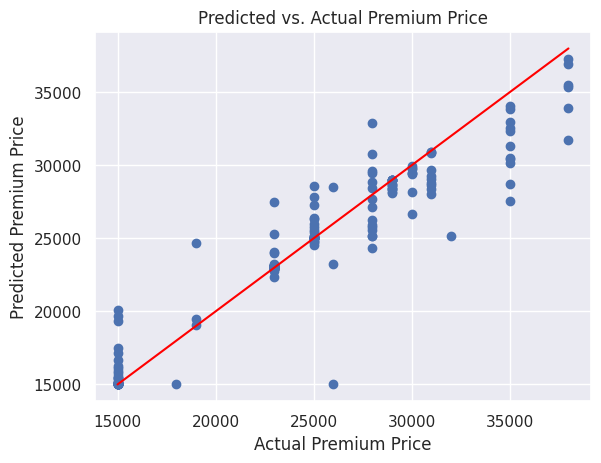

In [31]:
#Print out the fitting of the data for observation
plt.scatter(Premium_test, Premium_Predict)
plt.xlabel("Actual Premium Price")
plt.ylabel("Predicted Premium Price")
plt.title("Predicted vs. Actual Premium Price")
plt.plot([min(Premium_test), max(Premium_test)], [min(Premium_test), max(Premium_test)], color='red')  # Diagonal line
plt.show()

**The red line marks the prediction made by the test set, with the blue dots signifying the actual prices. THe further away the blue dots are, the more inaccurate the prediciton is.**

(Since our random forest has over 100 trees, it is not feasible to visualise them by printing them all out. So this scatter plot is a better option)


**Looking at our graph, the prediciton is fairly accurate, with most points being centered around the red line, meaning that our model is fairly accurate (Baaring the few outliers). We can further prove this by using the various accuracy or error calculations available to us.**

In [32]:
#We will check the accuracy with R^2, MSE and RMSE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(Premium_test, Premium_Predict)
rmse = np.sqrt(mean_squared_error(Premium_test, Premium_Predict))
mae = mean_absolute_error(Premium_test, Premium_Predict)

print("R² score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


R² score: 0.9000725106443597
RMSE: 1999.616899735708
MAE: 1057.687145324451


**With a high R^2 score of 0.9, and a low RMSE and MAE score relative to premium price, the random forest is a very strong model at predicting the premium prices based on the factors that were given to it**


Feature Importances:
Age                        0.684281
AnyTransplants             0.116231
Weight                     0.099094
AnyChronicDiseases         0.049046
HistoryOfCancerInFamily    0.022939
hadMajorSurgery            0.011966
Diabetes                   0.008810
BloodPressureProblems      0.007632
dtype: float64


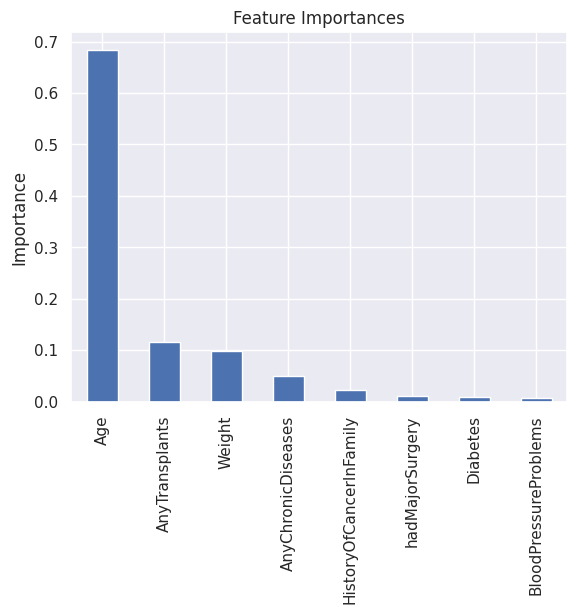

In [33]:
feature_importances = model.feature_importances_

# Create a pandas Series with the feature importances and their corresponding feature names
importances = pd.Series(feature_importances, index=The_others.columns)

# Sort the importances in descending order
sorted_importances = importances.sort_values(ascending=False)

print("Feature Importances:")
print(sorted_importances)

# Plot the feature importances
sorted_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

**We mentioned previously that our data is mostly categorical, making it hard to judge the importance/correlation of them**

**Thankfully, random forest gives us access to the 'feature importance' feature, allowing su to estimate the impportance of the various data in predicting premium prices**

**As we can clearly see, age is a very important indicator, having a value of almost 0.7/1, which is strongly supported by the high correlation as shown in our EDA**

**But surprisingly, our categorical data has relatively low importance when it comes to predicting premium prices! But they are still useful for the prediction!**

**But for comparison's sake and in search for a potentially better model, we will also be exploring the usage of CatBoost model**


**Part 2: CatBoost**

NEED TO PIP INSTALL CATBOOST 

In [34]:
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.7 MB/s eta 0:00:00


**We have decided to go with a Catboost machine learning model for a few reasons:**

1)Our dataset contains mostly categorical data. CatBoost is a machine learning model that excels at handling categorical data compared to other models while also able to incoporate numerical data. As such, Catboost can potentially make stronger predictions due to the large amount of categorical data. 

2)CatBoost employs something called Gradient boosting. Gradient boosting starts off by initialising a weak predictive model, compute the differences between the actual value and the predicted value, then iteratively improve itself by correcting mistakes made by previous iterations. This method can improve the accuracy of CatBoost, allowing it to potentially be more accurate than random forest or decision trees

3)The design of CatBoost resolves the over fitting that decision trees suffer from, and also provide a feature importance, similar to random forest

In [35]:
from catboost import CatBoostRegressor

In [36]:
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyChronicDiseases', 'AnyTransplants', 'HistoryOfCancerInFamily','hadMajorSurgery']
cat_features_indices = [The_others.columns.get_loc(col) for col in categorical_features]

# Create and train the CatBoostRegressor model
model = CatBoostRegressor(cat_features=cat_features_indices, random_state=4, verbose=False)
model.fit(The_others_train, Premium_train)

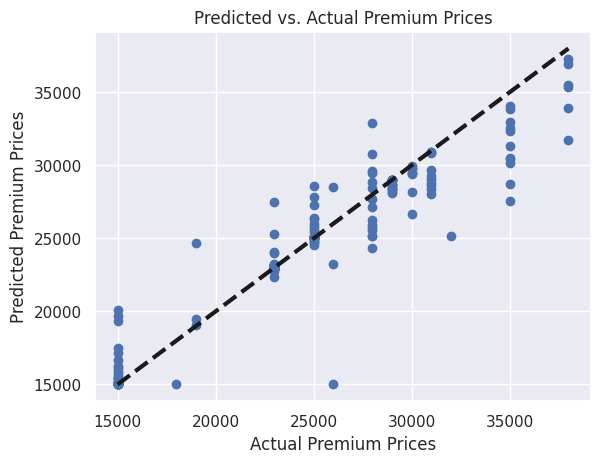

In [37]:
plt.scatter(Premium_test, Premium_Predict)
plt.xlabel('Actual Premium Prices')
plt.ylabel('Predicted Premium Prices')
plt.title('Predicted vs. Actual Premium Prices')
plt.plot([Premium_test.min(), Premium_test.max()], [Premium_test.min(), Premium_test.max()], 'k--', lw=3)
plt.show()


**This is very similar to our random forest in concept and in result! Fairly accurate with some small outliers**

In [38]:
Premium_Predict = model.predict(The_others_test)

r2 = r2_score(Premium_test, Premium_Predict)
rmse = np.sqrt(mean_squared_error(Premium_test, Premium_Predict))
mae = mean_absolute_error(Premium_test, Premium_Predict)

print("R² score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² score: 0.8859350949078566
RMSE: 2136.38899538781
MAE: 1334.5358840662134


**Looking at the accuracy of catboost, it is fairly accurate with a 0.88 r^2 and a relatively low MAE and RMSE. However, it is lower than random forest which sat at 0.9 r^2. However, this can easily be attributed to the fact that our categorical data is fairly weak in terms of correlation, which results in catboost being slightly less accurate compared to random forest. We can verify this by looking at catboost's feature importance graph**

Diabetes: 1.81
BloodPressureProblems: 1.70
AnyChronicDiseases: 8.23
AnyTransplants: 16.50
HistoryOfCancerInFamily: 3.94
Age: 51.03
Weight: 14.52
hadMajorSurgery: 2.28


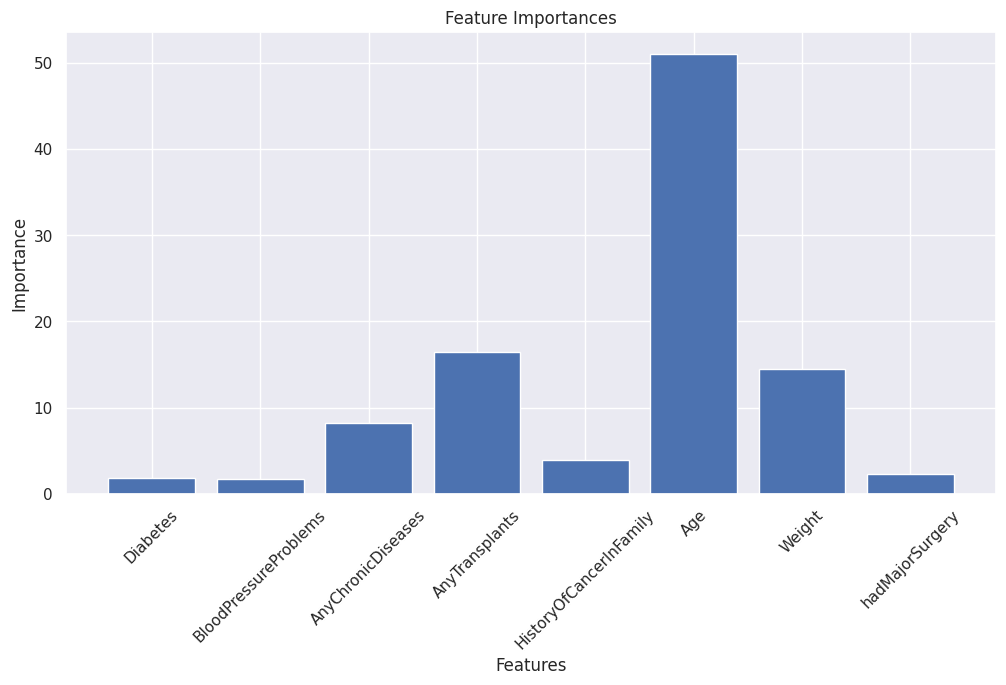

In [39]:
# Get feature importances
feature_importances = model.get_feature_importance()

# Print the feature importances
for feature, importance in zip(The_others.columns, feature_importances):
    print(f"{feature}: {importance:.2f}")


plt.figure(figsize=(12, 6))

# Create a bar chart of feature importances
plt.bar(The_others.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

**Unlike random forest's feature importance, which gives a correlation number similar to the correlation matrix, Catboost's feature importance adds up to 100, so it is not fundamentally any different. But for consistency, we will make them into decimal values below** 



Proof of feature importance adding to 100:
Catboost documentation
https://catboost.ai/en/docs/concepts/fstr

In [40]:
# Normalize feature importances
normalized_importances = feature_importances / feature_importances.sum()

# Print the normalized feature importances
for feature, importance in zip(The_others.columns, normalized_importances):
    print(f"{feature}: {importance:.2f}")


Diabetes: 0.02
BloodPressureProblems: 0.02
AnyChronicDiseases: 0.08
AnyTransplants: 0.16
HistoryOfCancerInFamily: 0.04
Age: 0.51
Weight: 0.15
hadMajorSurgery: 0.02
